# PRAKTIKUM IV: Clustering dengan Metode DBScan
oleh: Mohammad Rizka Fadhli (20921004)

## Tugas

Pada praktikum ini, saya melakukan _clustering_ dari `training data.csv` pada _link_ github berikut [ini](https://raw.githubusercontent.com/salmanhiro/Praktikum-Data-Mining/main/Praktikum%204/Training%20Data.csv) menggunakan metode DBScan.

_Notebook_ praktikum ini bisa dilihat di _link_ [berikut ini](https://colab.research.google.com/drive/1JnBkA2d8NIRBk1vLmfwmAe_BETTK4w-l?usp=sharing).

## Catatan

Saya menggunakan bahasa __R__ pada _environment_ `Google Colab`.

## Langkah Kerja
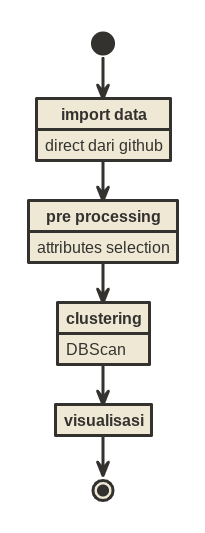

In [1]:
# instalasi library yang dibutuhkan
#install.packages("fpc")
#install.packages("dbscan")
#install.packages("janitor")
#install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


also installing the dependency ‘snakecase’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# membersihkan global environment
rm(list=ls())

# memanggil semua libraries pada komputasi ini
library(dplyr)
library(ggplot2)
library(fpc)
library(dbscan)

# memanggil dataset langsung dari github
dataset = read.csv("https://raw.githubusercontent.com/salmanhiro/Praktikum-Data-Mining/main/Praktikum%204/Training%20Data.csv") %>%
          janitor::clean_names()

# melihat struktur dataset
dataset %>% str()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘dbscan’


The following object is masked from ‘package:fpc’:

    dbscan


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


'data.frame':	252000 obs. of  13 variables:
 $ id               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ income           : int  1303834 7574516 3991815 6256451 5768871 6915937 3954973 1706172 7566849 8964846 ...
 $ age              : int  23 40 66 41 47 64 58 33 24 23 ...
 $ experience       : int  3 10 4 2 11 0 14 2 17 12 ...
 $ married_single   : chr  "single" "single" "married" "single" ...
 $ house_ownership  : chr  "rented" "rented" "rented" "rented" ...
 $ car_ownership    : chr  "no" "no" "no" "yes" ...
 $ profession       : chr  "Mechanical_engineer" "Software_Developer" "Technical_writer" "Software_Developer" ...
 $ city             : chr  "Rewa" "Parbhani" "Alappuzha" "Bhubaneswar" ...
 $ state            : chr  "Madhya_Pradesh" "Maharashtra" "Kerala" "Odisha" ...
 $ current_job_yrs  : int  3 9 4 2 3 0 8 2 11 5 ...
 $ current_house_yrs: int  13 13 10 12 14 12 12 14 11 13 ...
 $ risk_flag        : int  0 0 0 1 1 0 0 0 0 0 ...


# _Preprocessing Data_

## Catatan dari Struktur Data

Terlihat dari hasil di atas, tidak semua atribut akan saya ikut sertakan dalam membuat _cluster_. Saya hanya akan mengikutsertakan atribut-atribut numerik saja seperti:

1. `income`
1. `age`
1. `experience`
1. `current_job_yrs`
1. `current_house_yrs`

Selain itu, saya melakukan _scaling_ dari semua atribut numerik tersebut.

     income               age              experience       current_job_yrs   
 Min.   :-1.732546   Min.   :-1.696807   Min.   :-1.68001   Min.   :-1.73671  
 1st Qu.:-0.866516   1st Qu.:-0.876359   1st Qu.:-0.84704   1st Qu.:-0.91413  
 Median : 0.001243   Median : 0.002692   Median :-0.01407   Median :-0.09155  
 Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.861750   3rd Qu.: 0.881743   3rd Qu.: 0.81891   3rd Qu.: 0.73103  
 Max.   : 1.738110   Max.   : 1.702190   Max.   : 1.65188   Max.   : 2.10200  
 current_house_yrs  
 Min.   :-1.427978  
 1st Qu.:-0.713200  
 Median : 0.001577  
 Mean   : 0.000000  
 3rd Qu.: 0.716354  
 Max.   : 1.431132  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



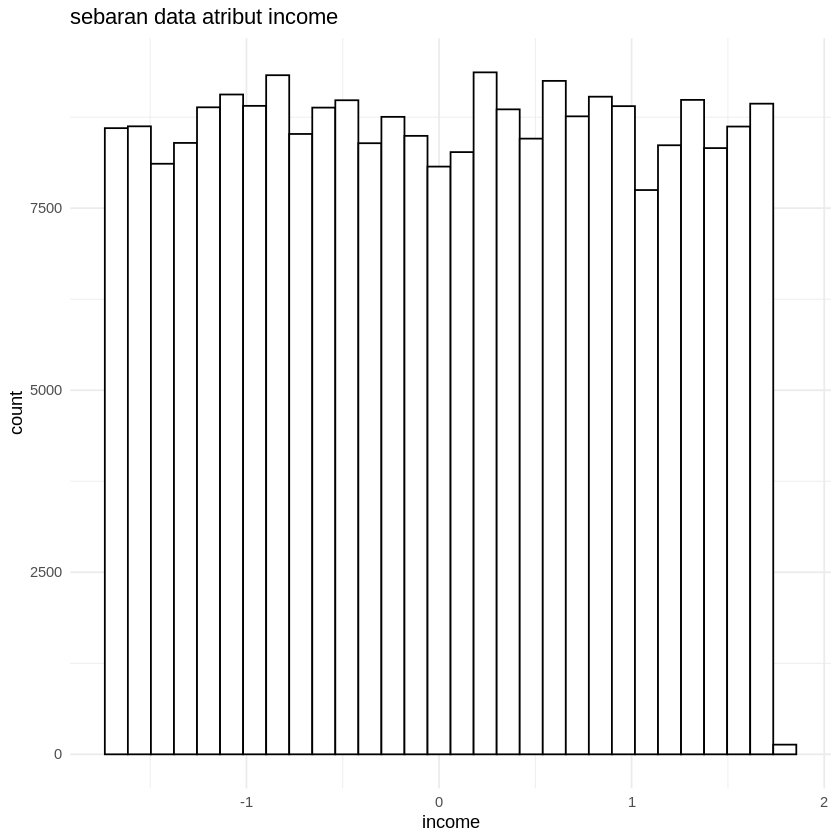

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



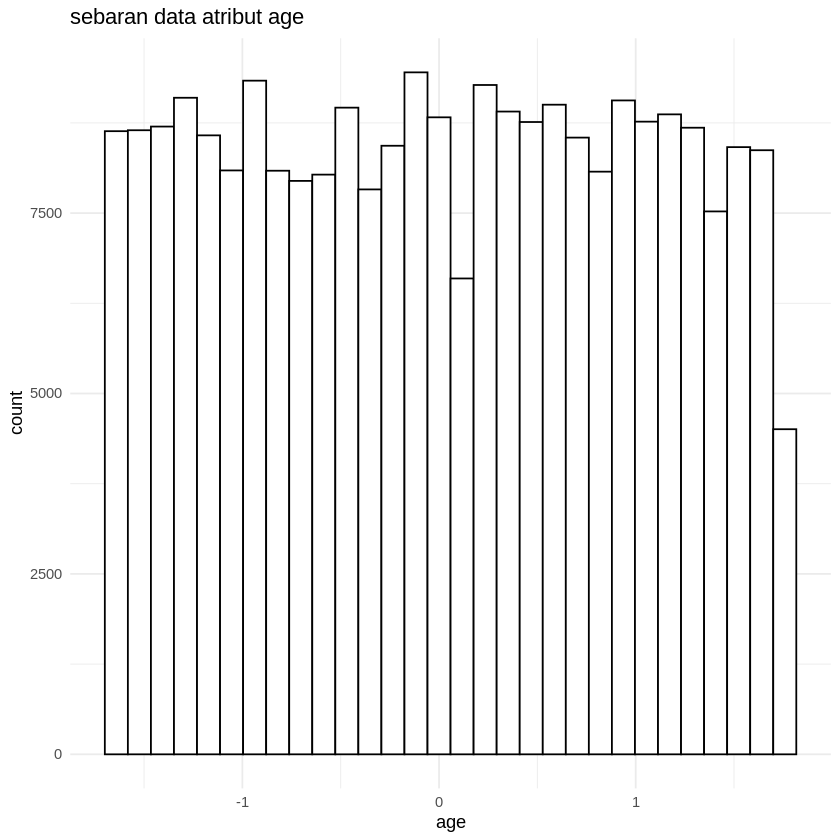

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



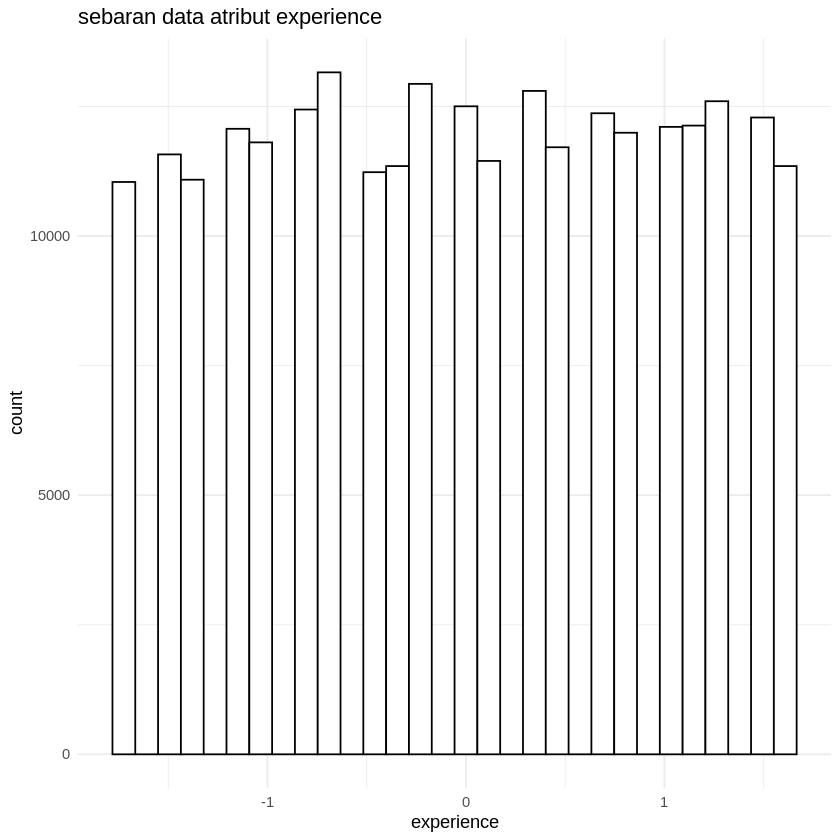

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



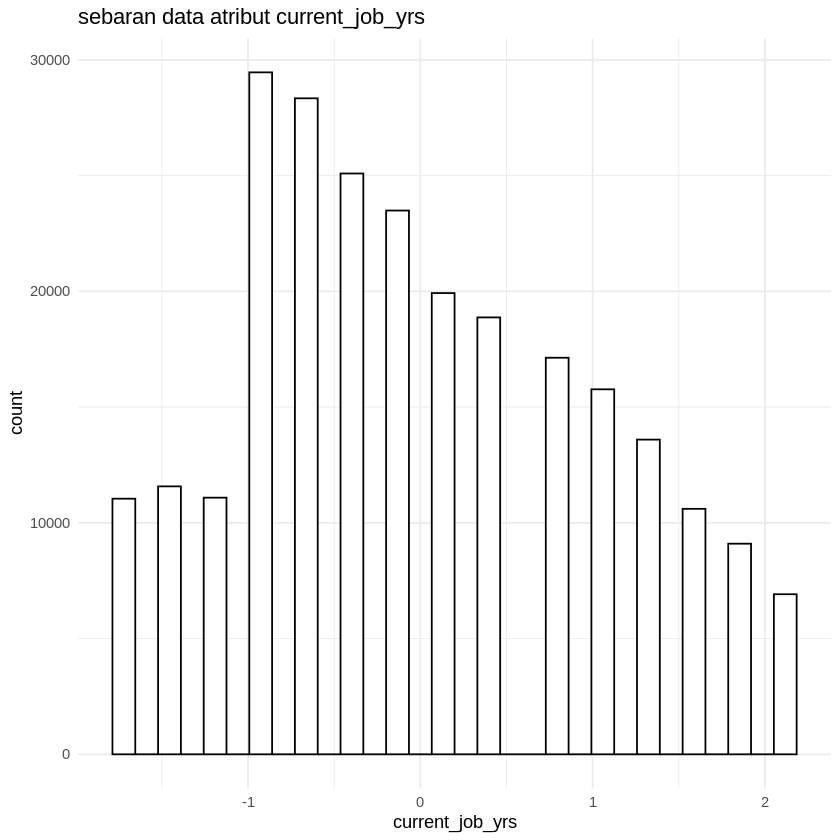

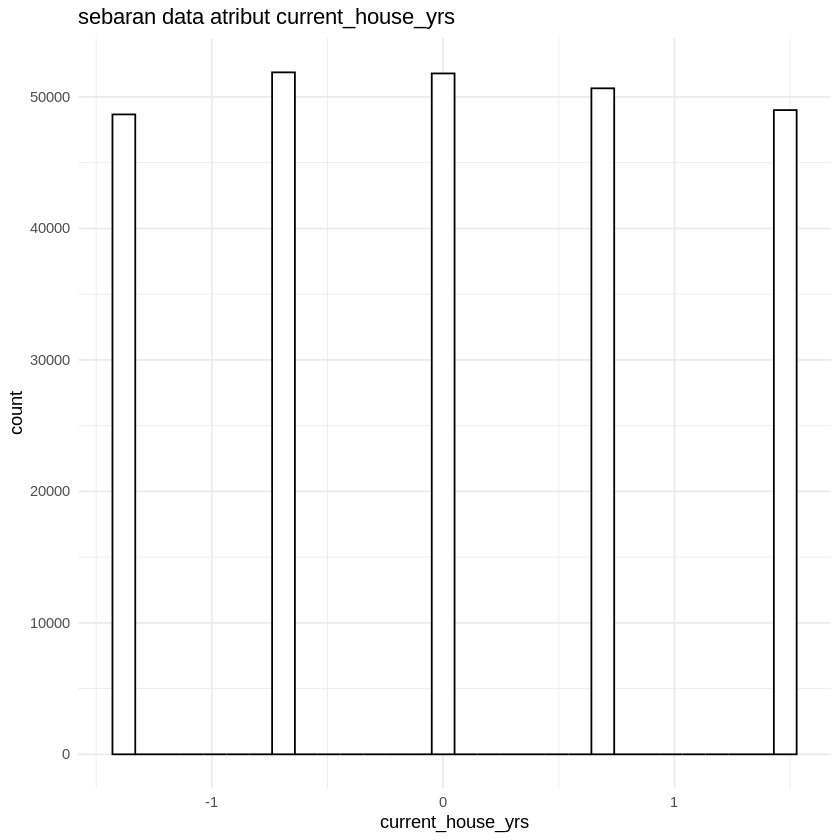

In [3]:
# memilih atribut numerik saja
data_cl = 
  dataset %>%
  select(income,age,experience,current_job_yrs,current_house_yrs) %>%
  scale() %>%
  as.data.frame()

# melihat statistika deskripsi dari data tersebut
data_cl %>% summary()

# membuat histogram dari data yang ada
# income
data_cl %>%
  ggplot(aes(x = income)) + 
  geom_histogram(fill = "white",color = "black") + 
  labs(title = "sebaran data atribut income") +
  theme_minimal()
# age
data_cl %>%
  ggplot(aes(x = age)) + 
  geom_histogram(fill = "white",color = "black") + 
  labs(title = "sebaran data atribut age") +
  theme_minimal()
# experience
data_cl %>%
  ggplot(aes(x = experience)) + 
  geom_histogram(fill = "white",color = "black") + 
  labs(title = "sebaran data atribut experience") +
  theme_minimal()
# current_job_yrs
data_cl %>%
  ggplot(aes(x = current_job_yrs)) + 
  geom_histogram(fill = "white",color = "black") + 
  labs(title = "sebaran data atribut current_job_yrs") +
  theme_minimal()
# current_house_yrs
data_cl %>%
  ggplot(aes(x = current_house_yrs)) + 
  geom_histogram(fill = "white",color = "black") + 
  labs(title = "sebaran data atribut current_house_yrs") +
  theme_minimal()

## Analisa Korelasi

Sekarang saya cek korelasi antar atribut pada data tersebut. Berikut adalah matriks korelasinya:

In [4]:
# membuat matriks korelasi antar atribut
cor(data_cl) %>% round(2)

,income,age,experience,current_job_yrs,current_house_yrs
income,1.00,0.00,0.01,0.01,0.00
age,0.00,1.00,0.00,0.00,-0.02
experience,0.01,0.00,1.00,0.65,0.02
current_job_yrs,0.01,0.00,0.65,1.00,0.01
current_house_yrs,0.00,-0.02,0.02,0.01,1.00


## _Clustering_ DBScan

Berikut adalah hasil _clustering_ dengan menggunakan metode _DBScan_.

Salah satu langkah yang perlu dilakukan adalah menentukan nilai `eps` yang paling optimal.

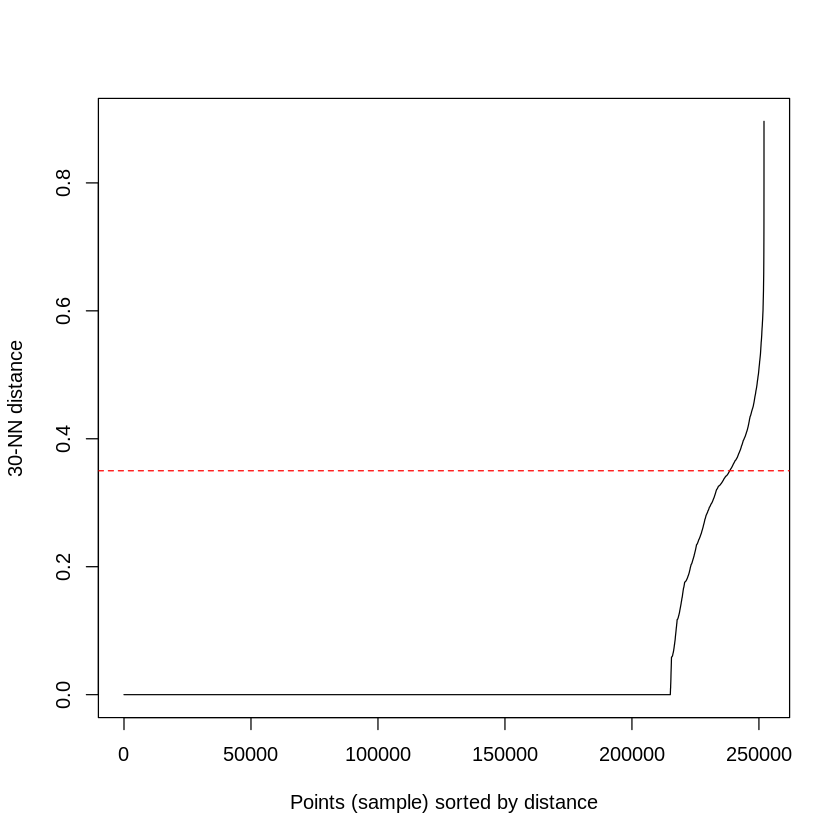

In [5]:
dbscan::kNNdistplot(data_cl, k = 30)
abline(h = .35, lty = 2, col = "red")

Dipilih nilai $eps = 0.35$ sebagai parameter pembentukan _DBScan_.

In [10]:
# membuat clustering DBScan
# set sed agar reproducible
set.seed(20921004)
Dbscan_cl = dbscan(data_cl, eps = 0.35, minPts = 5)

# menambahkan cluster ke dalam dataset
data_cl$cluster = Dbscan_cl$cluster

# menghitung ada berapa banyak cluster yang ada
data_cl$cluster %>% unique() %>% length()

[1] 292

Tercatat ada `292` buah cluster yang terbentuk. Sekarang kita akan buat plot dari data yang ada.

Berikut adalah plot hasilnya saat digambarkan dalam sumbu x dan y dengan:

1. Sumbu $x$ adalah `current_job_yrs`.
1. Sumbu $y$ adalah `experience`.

Sementara gradasi warna akan dijadikan _marker_ untuk cluster-nya.

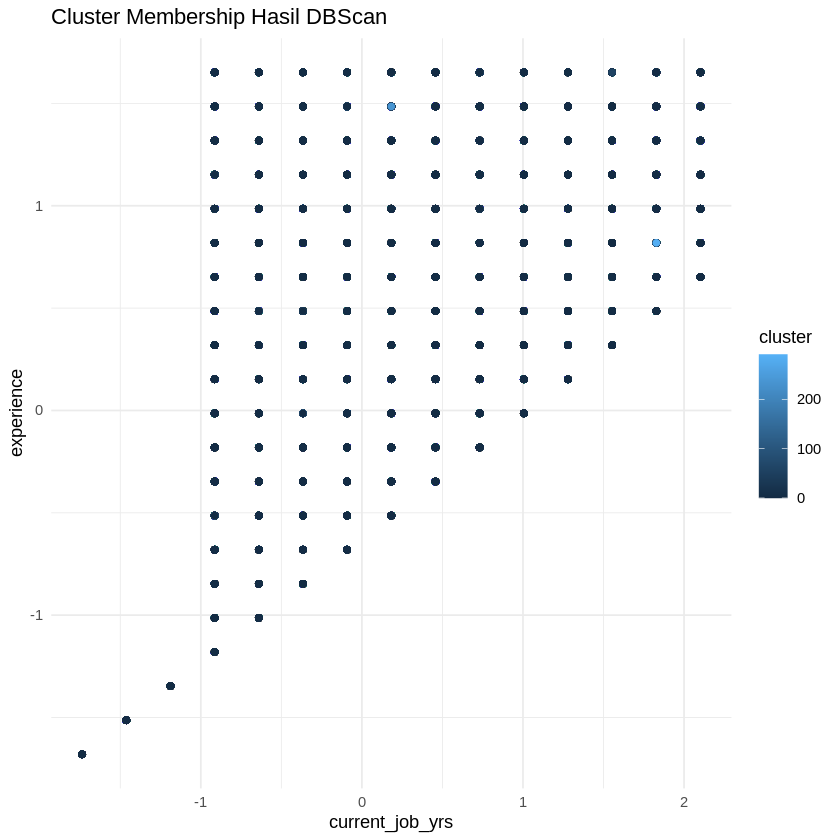

In [11]:
# plot hasil clustering
data_cl %>%
  ggplot(aes(x = current_job_yrs,
             y = experience,
             color = cluster
             )) +
  geom_point() +
  labs(title = "Cluster Membership Hasil DBScan") +
  theme_minimal()

Jika kita lihat, plot di atas sepertinya tidak bisa digunakan untuk melihat cluster membership karena persebaran titiknya cukup seragam.

Saya akan coba buatkan satu visualisasi lagi yang merupakan _scatterplot_ dari semua pasangan atribut yang ada dari data:

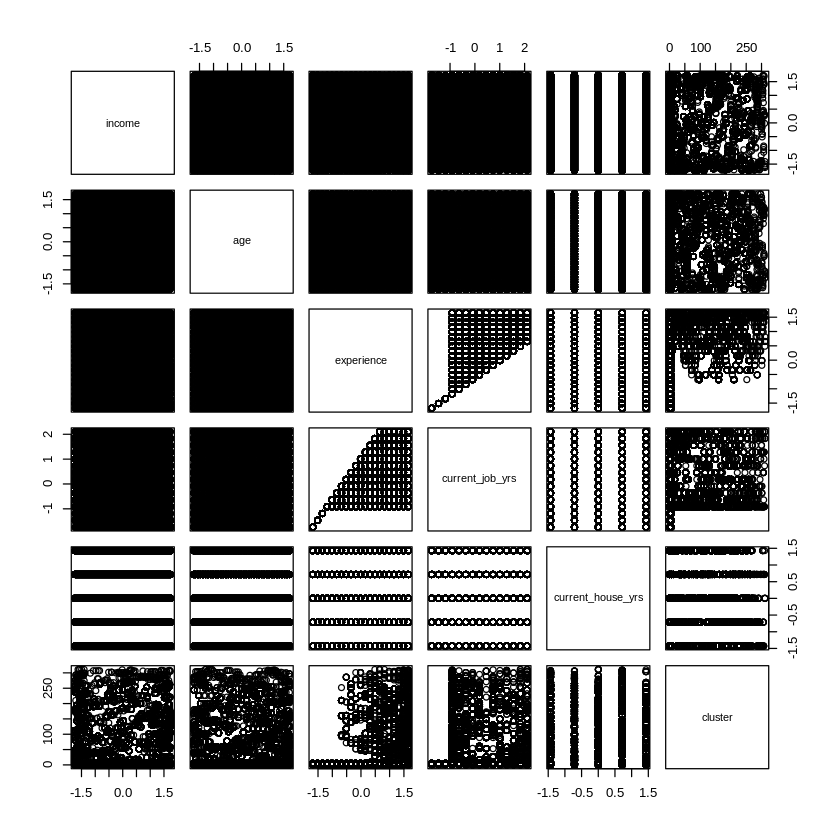

In [8]:
pairs(data_cl)

Dari visualisasi di atas, sepertinya memang kita tidak bisa mendapatkan visualisasi _scatterplot_ yang dengan jelas menggambarkan _cluster membership_.